### Swapnil Barde

###### 1. Load Libraries

In [1]:
import pandas as pd
from pandas import DataFrame, Series
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from scipy.stats import skew



import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')


###### 2. Data Mining & Inspection

* **1. id:**	Unique ID for the customer


* **2. Gender:**	Gender of the customer


* **3. Age:**	Age of the customer


* **4. Driving_License:**	   **1** : Customer already has DL, **0**: Customer does not have DL


* **5. Region_Code:**	Unique code for the region of the customer


* **6. Previously_Insured:**	  **1** : Customer already has Vehicle Insurance, **0** : Customer doesn't have Vehicle Insurance


* **7. Vehicle_Age:**	Age of the Vehicle


* **8. Vehicle_Damage:**	**1** : Customer got his/her vehicle damaged in the past. **0** : Customer didn't get his/her vehicle                damaged in the past.


* **9. Annual_Premium:**	The amount customer needs to pay as premium in the year


* **10. PolicySalesChannel:**	Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over                Mail, Over Phone, In Person, etc.


* **11. Vintage:**	Number of Days, Customer has been associated with the company


* **12. Response:**	**1** : Customer is interested, **0** : Customer is not interested

In [2]:
train = pd.read_csv('train.csv',na_values=['?'])
test = pd.read_csv('test.csv', na_values=['?'])

In [3]:
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [4]:
train.shape

(381109, 12)

In [5]:
test.shape

(127037, 11)

In [6]:
print(train.info())
print('***********************************************')
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB
None
***********************************************
<class 'pandas.core.frame.DataFrame'>
RangeIn

In [7]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,381109.0,190555.000000,110016.836208,1.0,95278.0,190555.0,285832.0,381109.0
Age,381109.0,38.822584,15.511611,20.0,25.0,36.0,49.0,85.0
Driving_License,381109.0,0.997869,0.046110,0.0,1.0,1.0,1.0,1.0
Region_Code,381109.0,26.388807,13.229888,0.0,15.0,28.0,35.0,52.0
Previously_Insured,381109.0,0.458210,0.498251,0.0,0.0,0.0,1.0,1.0
Annual_Premium,381109.0,30564.389581,17213.155057,2630.0,24405.0,31669.0,39400.0,540165.0
Policy_Sales_Channel,381109.0,112.034295,54.203995,1.0,29.0,133.0,152.0,163.0
Vintage,381109.0,154.347397,83.671304,10.0,82.0,154.0,227.0,299.0
Response,381109.0,0.122563,0.327936,0.0,0.0,0.0,0.0,1.0


In [8]:
train.isnull().sum()/train.shape[0] *100

id                      0.0
Gender                  0.0
Age                     0.0
Driving_License         0.0
Region_Code             0.0
Previously_Insured      0.0
Vehicle_Age             0.0
Vehicle_Damage          0.0
Annual_Premium          0.0
Policy_Sales_Channel    0.0
Vintage                 0.0
Response                0.0
dtype: float64

In [9]:
test.isnull().sum()/train.shape[0] *100

id                      0.0
Gender                  0.0
Age                     0.0
Driving_License         0.0
Region_Code             0.0
Previously_Insured      0.0
Vehicle_Age             0.0
Vehicle_Damage          0.0
Annual_Premium          0.0
Policy_Sales_Channel    0.0
Vintage                 0.0
dtype: float64

In [10]:
print(train.isnull().sum())
print('\n', test.isnull().sum())

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

 id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
dtype: int64


* **We can see that there is no missing values in our dataset. Thus we do not need to impute any values and can proceed for further analysis**


###### 3. Exploratory Data Analysis

In [11]:
train['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [12]:
train['Gender'].value_counts()

Male      206089
Female    175020
Name: Gender, dtype: int64

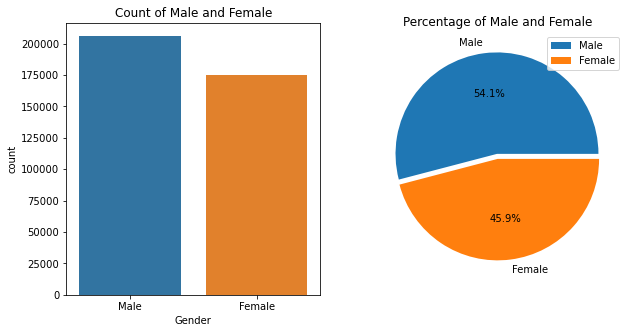

In [13]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)  #Univariate Analysis
plt.title('Count of Male and Female')
sns.countplot(train['Gender'])

plt.subplot(1,2,2)
plt.pie(train['Gender'].value_counts(), explode=[0.05,0] ,autopct='%.1f%%', labels=['Male', 'Female'], labeldistance=1.1)
plt.title('Percentage of Male and Female')

plt.legend()
plt.show()

* **Conclusion -** Above Plots shows that Male tend to subscribe to insurence more than female. 
  Therefore we can assume that gender plays an important role in model building.



In [14]:
print(train['Age'].mean())

38.822583565331705


In [15]:
print(train['Age'].mode())


0    24
dtype: int64


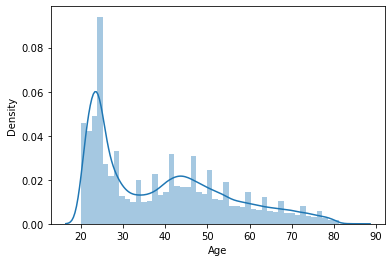

In [16]:
sns.distplot(x=train['Age'])
plt.xlabel('Age')
plt.show()

In [17]:
print(skew(train['Age']))


0.6725363506891485


* So here Age column has moderate skew, positive skew but its ok

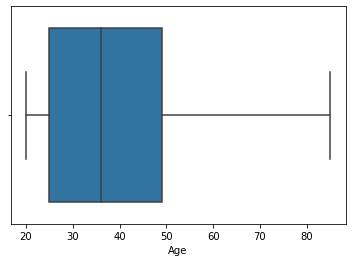

In [18]:
sns.boxplot(train['Age'])
plt.show()

In [19]:
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [20]:
train['Driving_License'].value_counts()

1    380297
0       812
Name: Driving_License, dtype: int64

* This shows that most of all people have driving license.. That's Good 

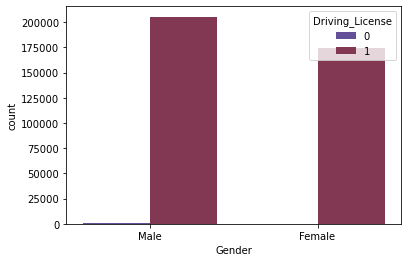

In [21]:
plt.figure(figsize=(6,4))
sns.countplot('Gender',hue = 'Driving_License', data=train, palette='twilight')
plt.show()

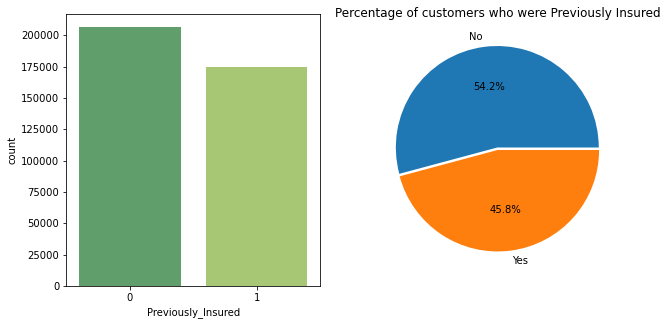

In [22]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.countplot(x = train["Previously_Insured"], palette='summer')

plt.subplot(1,2,2)
plt.pie(train['Previously_Insured'].value_counts(), explode=[0.025,0] ,autopct='%.1f%%', labels=['No', 'Yes'],
        labeldistance=1.1)
plt.title('Percentage of customers who were Previously Insured')

plt.show()

* **Conclusion -** So here we can see that most of the people have not previously insured 

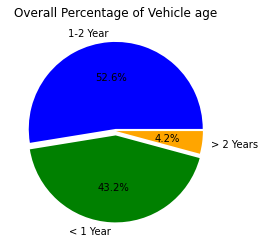

In [23]:
plt.pie(train['Vehicle_Age'].value_counts(), explode=[0.025,0.05, 0] ,colors=[ 'blue', 'green', 'orange'], 
        autopct='%.1f%%', 
        labels=list(train['Vehicle_Age'].value_counts().index), labeldistance=1.1)
plt.title('Overall Percentage of Vehicle age')
plt.show()

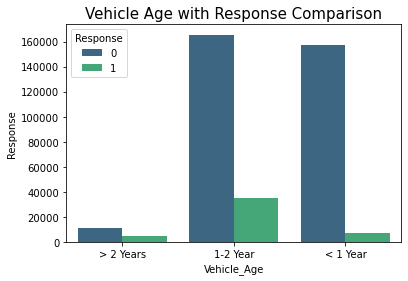

In [24]:
#Univariate Analysis
sns.countplot(train['Vehicle_Age'],hue=train['Response'],palette='viridis')
plt.title('Vehicle Age with Response Comparison',fontsize=15)
plt.ylabel('Response')
plt.show()

* We can see that buyers whose vehicle are between 1 to 2 years are more entrusted to buy insurance rather whose vehicle are less than 1 year or more than 2 years.

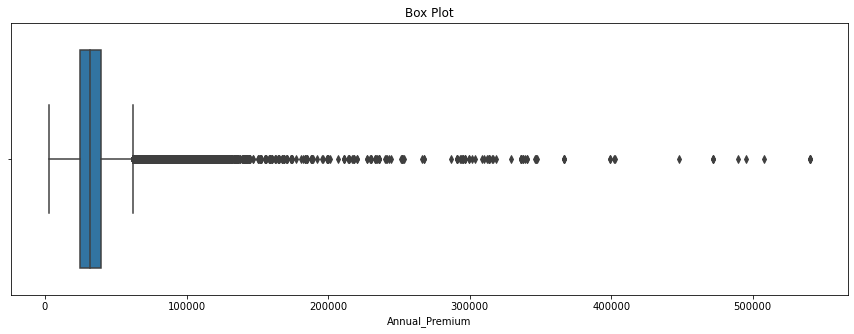

In [25]:
plt.figure(figsize = (15,5))
sns.boxplot(train['Annual_Premium'])
plt.title('Box Plot')
plt.show()

* Question here is should we remove these ouliers in Annual_Premium data , but I think if a person is paying money more than Rs61892 annually , may he/she is a rich person who is capable of paying that much more money than others
* 10392 people are outliers if we remove them we can loss data from the table
* So the conclusion is we won't change anything is annual_premium data

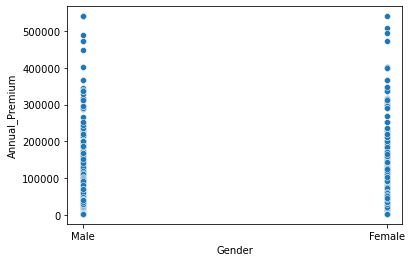

In [26]:
sns.scatterplot(x='Gender',y='Annual_Premium',data=train)
plt.show()

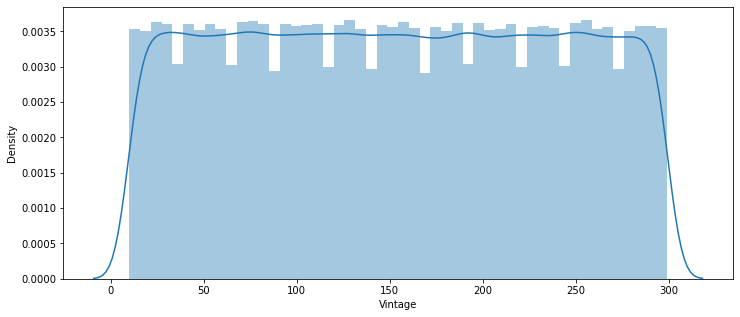

In [27]:
plt.figure(figsize=(12,5))

sns.distplot(train['Vintage'])

plt.show()

* **This Column is uniformly distributed we can't do nothing much to this column**



In [28]:
train['Response'].value_counts()

0    334399
1     46710
Name: Response, dtype: int64

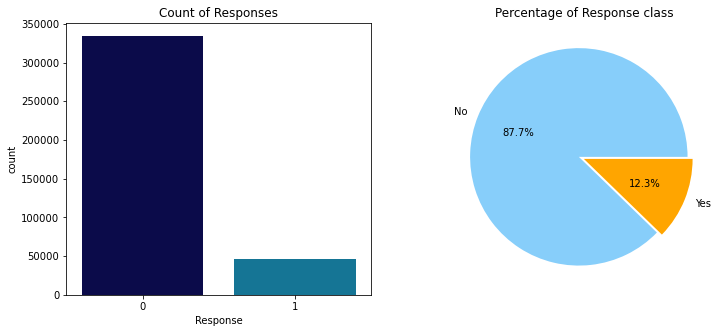

In [29]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.title('Count of Responses')
sns.countplot('Response', data=train, palette='ocean')

plt.subplot(1,2,2)
plt.pie(train['Response'].value_counts(), explode=[0.05,0] , colors=[ 'lightskyblue', 'orange'] ,autopct='%.1f%%', labels=['No', 'Yes'], labeldistance=1.1)
plt.title('Percentage of Response class')

plt.show()


* **From the above graph and percentages we can clearly see that negative response is more than positive response in terms of buying insurance**

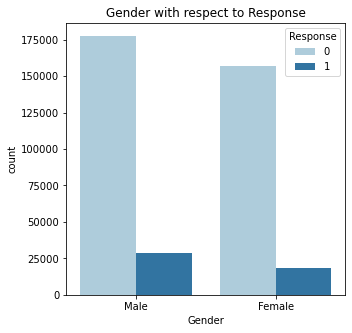

In [30]:
plt.figure(figsize=(5,5))

sns.countplot(train['Gender'], hue=train['Response'], palette='Paired')
plt.title('Gender with respect to Response')

plt.show()


In [31]:
#Splitting Male & Female customers and analysing based on overall customers

male = train[train['Gender']=='Male']
female = train[train['Gender']=='Female']


count_response = []

#Count of customers who have not purchased/responded to vehicle insurance
count_response.append(train[train['Response'] == 0]['Response'].count())

#Count of customers who have purchased/responded to vehicle insurance and those who are Male customers
count_response.append(male[male['Response']==1]['Response'].count())

#Count of customers who have purchased/responded to vehicle insurance and those who are Female customers
count_response.append(female[female['Response']==1]['Response'].count())

count_response


[334399, 28525, 18185]

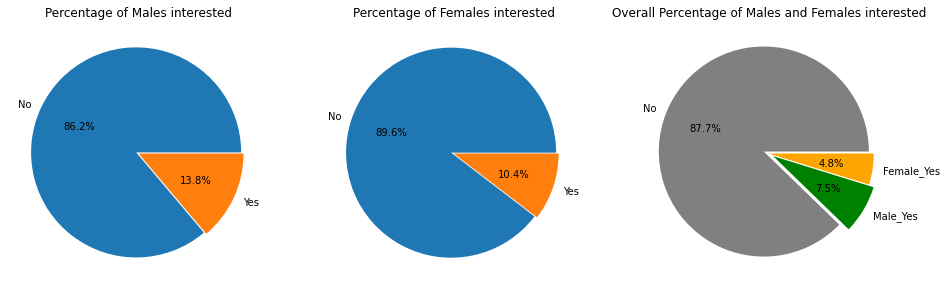

In [32]:
plt.figure(figsize=(16,7))

plt.subplot(1,3,1)
plt.pie(male['Response'].value_counts(), explode=[0.025,0] ,autopct='%.1f%%', labels=['No', 'Yes'], labeldistance=1.1)
plt.title('Percentage of Males interested')

plt.subplot(1,3,2)
plt.pie(female['Response'].value_counts(), explode=[0.025,0] ,autopct='%.1f%%', labels=['No', 'Yes'], labeldistance=1.1)
plt.title('Percentage of Females interested')

plt.subplot(1,3,3)
plt.pie(count_response, explode=[0.05,0.05, 0] ,colors=[ 'grey', 'green', 'orange'], autopct='%.1f%%', labels=['No', 'Male_Yes', 'Female_Yes'], labeldistance=1.1)
plt.title('Overall Percentage of Males and Females interested')

plt.show()


* **Conclusion -**  From this graph we can clearly see that Male are having positive response towards insurance purchase while female are having negative response.Thus from this we can conclude that the most targeted customers are Male than Female.So, we need to focus on strengthening the Female customers buyers for buying the insurance.



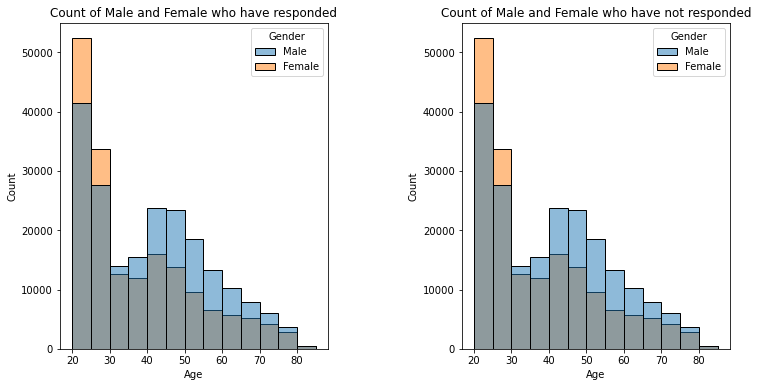

In [33]:
plt.figure(figsize=(12,6))
plt.subplots_adjust(wspace=0.5)

plt.subplot(1,2,1)
sns.histplot(data=train, x='Age', hue='Gender', binwidth=5)
plt.title('Count of Male and Female who have responded')

plt.subplot(1,2,2)
sns.histplot(data=train, x='Age', hue='Gender', binwidth=5)
plt.title('Count of Male and Female who have not responded')
plt.show()


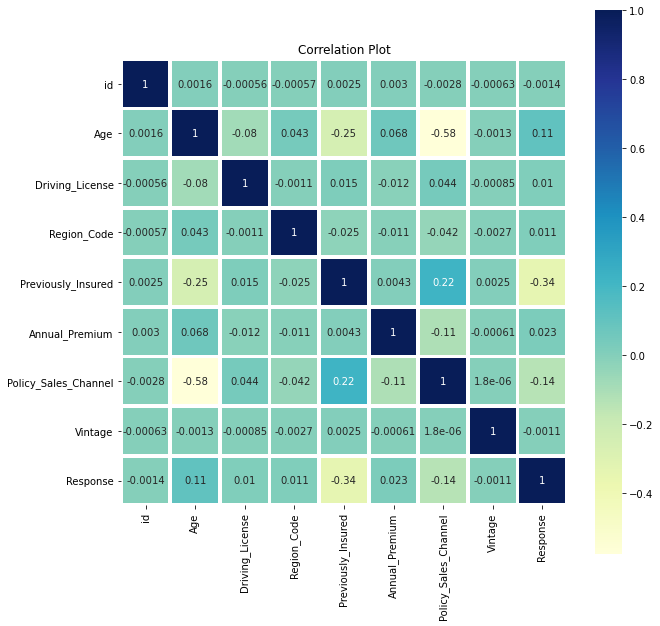

In [34]:
plt.figure(figsize = (10,10))
plt.title("Correlation Plot")
sns.heatmap(train.corr(), linewidth = 3, annot = True, square = True,  cmap="YlGnBu")
plt.show()

###### 4. Data Preprocessing

In [35]:
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [36]:
train['Vehicle_Age'].unique()

array(['> 2 Years', '1-2 Year', '< 1 Year'], dtype=object)

In [37]:
train['Policy_Sales_Channel'].unique()

array([ 26., 152., 160., 124.,  14.,  13.,  30., 156., 163., 157., 122.,
        19.,  22.,  15., 154.,  16.,  52., 155.,  11., 151., 125.,  25.,
        61.,   1.,  86.,  31., 150.,  23.,  60.,  21., 121.,   3., 139.,
        12.,  29.,  55.,   7.,  47., 127., 153.,  78., 158.,  89.,  32.,
         8.,  10., 120.,  65.,   4.,  42.,  83., 136.,  24.,  18.,  56.,
        48., 106.,  54.,  93., 116.,  91.,  45.,   9., 145., 147.,  44.,
       109.,  37., 140., 107., 128., 131., 114., 118., 159., 119., 105.,
       135.,  62., 138., 129.,  88.,  92., 111., 113.,  73.,  36.,  28.,
        35.,  59.,  53., 148., 133., 108.,  64.,  39.,  94., 132.,  46.,
        81., 103.,  90.,  51.,  27., 146.,  63.,  96.,  40.,  66., 100.,
        95., 123.,  98.,  75.,  69., 130., 134.,  49.,  97.,  38.,  17.,
       110.,  80.,  71., 117.,  58.,  20.,  76., 104.,  87.,  84., 137.,
       126.,  68.,  67., 101., 115.,  57.,  82.,  79., 112.,  99.,  70.,
         2.,  34.,  33.,  74., 102., 149.,  43.,   

In [38]:

from sklearn.preprocessing import LabelEncoder
col = ['Gender', 'Vehicle_Age','Vehicle_Damage']
le = LabelEncoder()
for LE in col:
    train[LE] = le.fit_transform(train[LE])


In [39]:

from sklearn.preprocessing import LabelEncoder
col = ['Gender', 'Vehicle_Age','Vehicle_Damage']
le = LabelEncoder()
for LE in col:
    test[LE] = le.fit_transform(test[LE])


In [40]:
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,1,28.0,0,2,1,40454.0,26.0,217,1
1,2,1,76,1,3.0,0,0,0,33536.0,26.0,183,0
2,3,1,47,1,28.0,0,2,1,38294.0,26.0,27,1
3,4,1,21,1,11.0,1,1,0,28619.0,152.0,203,0
4,5,0,29,1,41.0,1,1,0,27496.0,152.0,39,0


In [41]:
test.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,1,25,1,11.0,1,1,0,35786.0,152.0,53
1,381111,1,40,1,28.0,0,0,1,33762.0,7.0,111
2,381112,1,47,1,28.0,0,0,1,40050.0,124.0,199
3,381113,1,24,1,27.0,1,1,1,37356.0,152.0,187
4,381114,1,27,1,28.0,1,1,0,59097.0,152.0,297


###### 5. Data Scaling & Data Splitting

In [42]:
#dependent and independent variables

X=train.drop(['Response'],axis=1)      #independent variable

y=train['Response']                    #dependent variable

X.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,1,1,44,1,28.0,0,2,1,40454.0,26.0,217
1,2,1,76,1,3.0,0,0,0,33536.0,26.0,183
2,3,1,47,1,28.0,0,2,1,38294.0,26.0,27
3,4,1,21,1,11.0,1,1,0,28619.0,152.0,203
4,5,0,29,1,41.0,1,1,0,27496.0,152.0,39


In [43]:
train['Response'].unique()

array([1, 0], dtype=int64)

In [44]:
train['Response'].value_counts()

0    334399
1     46710
Name: Response, dtype: int64

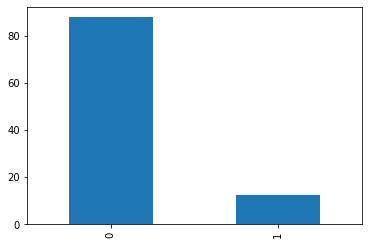

In [45]:
(train['Response'].value_counts(normalize= True)*100).plot(kind='bar')
plt.show()


* We can see that data is imbalanced with approx 85% of zero class and 15% of the other class.

* If such data is fed to the model as input, the classifier may make it biased w.r.t majority class as it was not provided with enough data of minority class to learn.

* So, to deal with this situation, we will apply one of the sampling techniques i.e SMOTE(Synthetic Minority Over-Sampling Technique) and check the results with imbalanced data.



In [46]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_smo, y_smo = oversample.fit_sample(X, y)


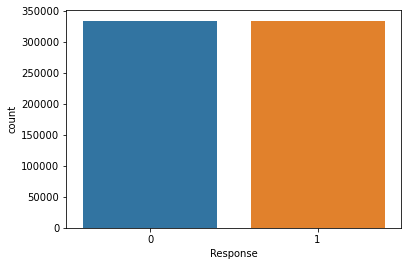

In [47]:
sns.countplot(y_smo)
plt.show()

In [48]:
y_smo.value_counts()

1    334399
0    334399
Name: Response, dtype: int64

In [49]:
#Scaling the independent variable to bring data in one range 

from sklearn.preprocessing import StandardScaler
SS=StandardScaler()

In [50]:
X1=SS.fit_transform(X_smo)
X1

array([[-1.73210913,  1.06656833,  0.25159035, ...,  0.53216437,
        -1.48985042,  0.80992867],
       [-1.73210003,  1.06656833,  2.60801872, ...,  0.14234055,
        -1.48985042,  0.37304963],
       [-1.73209094,  1.06656833,  0.47250551, ...,  0.41045008,
        -1.48985042, -1.63145419],
       ...,
       [-0.56391714, -0.93758644,  0.39886713, ..., -0.35706375,
        -0.01782893,  0.96412127],
       [ 0.91818603, -0.93758644,  0.76705906, ...,  0.50503757,
        -1.48338942, -0.19232324],
       [ 1.17615111, -0.93758644,  0.47250551, ..., -1.59918805,
         0.45928646,  1.05406696]])

In [51]:
#Sacling Of Test DataSet

X2 = SS.fit_transform(test)


In [52]:
#splitting the data into train(75%) and test(25%) for model

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X1,y_smo, test_size=0.25, random_state=1, stratify=y_smo)

#### 6. Machine Learning Model

* Machine Learning Libraries

In [53]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import f1_score, recall_score, accuracy_score, roc_auc_score, precision_score, auc, roc_curve,classification_report,confusion_matrix


In [54]:
model = {
    "DecisionTree Classifier": DecisionTreeClassifier(), 
    "SGD Classifier" : SGDClassifier(), 
    "RandomForest Classifier" : RandomForestClassifier(), 
    "Gradient Boosting" : GradientBoostingClassifier(),
    "KNeighbor Classifier" : KNeighborsClassifier(n_neighbors=3),
    "AdaBoost Classifier" : AdaBoostClassifier(random_state=0),
    "Bagging Classifier" : BaggingClassifier(random_state=0),
    "Logistic Regressor" : LogisticRegression(max_iter=15000, random_state=0)

        }


In [55]:
scores = []
prob_score = {}
for mod in model:
    classifier = model[mod]
    classifier.fit(X_train, y_train)
    pred = classifier.predict(X_test)
    try:
        score = classifier.predict_proba(X_test)[:,1]
        roc = roc_auc_score(y_test, score, average='weighted')
        prob_score[mod] = score
    except:
        roc = 0
    scores.append([
        mod,
        accuracy_score(y_test, pred),
        f1_score(y_test, pred, average='weighted'),
        precision_score(y_test, pred, average='weighted'),
        recall_score(y_test, pred, average='weighted'),
        roc
    ])


In [56]:
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

scores_df  = pd.DataFrame(scores)
index_model = {count: s for count, s in enumerate(scores_df[0])}
col = {count+1: s for count, s in enumerate(['Accuracy','F1 Score','Precision','Recall','ROC AUC'])}
scores_df = scores_df.drop(0, axis=1)
scores_df = scores_df.rename(columns=col, index=index_model)
scores_df.style.apply(highlight_max)


,Accuracy,F1 Score,Precision,Recall,ROC AUC
DecisionTree Classifier,0.880281,0.880278,0.880325,0.880281,0.880281
SGD Classifier,0.778714,0.773125,0.809181,0.778714,0.000000
RandomForest Classifier,0.897446,0.897446,0.897452,0.897446,0.970745
Gradient Boosting,0.867099,0.866853,0.869840,0.867099,0.954703
KNeighbor Classifier,0.846932,0.846773,0.848375,0.846932,0.904950
AdaBoost Classifier,0.851854,0.851468,0.855552,0.851854,0.942297
Bagging Classifier,0.901298,0.901209,0.902749,0.901298,0.965418
Logistic Regressor,0.785317,0.782116,0.803129,0.785317,0.857742


###### Bagging Classifier

In [57]:
from sklearn import tree
model = BaggingClassifier(tree.DecisionTreeClassifier(random_state=1))


In [58]:
model.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=1))

In [59]:
pred1 = model.predict(X_test)

In [60]:
print("Classification Report \n")
print(classification_report(y_test,pred1))


Classification Report 

              precision    recall  f1-score   support

           0       0.88      0.93      0.90     83600
           1       0.93      0.87      0.90     83600

    accuracy                           0.90    167200
   macro avg       0.90      0.90      0.90    167200
weighted avg       0.90      0.90      0.90    167200



In [61]:
print("Confusion Matrix\n")
print(confusion_matrix(y_test,pred1))


Confusion Matrix

[[77896  5704]
 [10657 72943]]


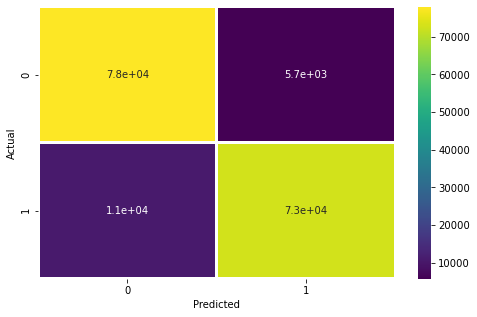

In [62]:
plt.figure(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test,pred1),cmap = 'viridis',annot = True,linewidths = 2,linecolor = 'white',fmt = '.2g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [63]:
pred2 = model.predict(X2)
pred2

array([0, 1, 1, ..., 0, 0, 0], dtype=int64)

In [64]:
from sklearn.metrics import roc_curve

In [65]:
score = roc_auc_score(y_test, pred1)
score

0.902147129186603

In [66]:
fpr, tpr, thresholds = roc_curve(y_test, pred1)

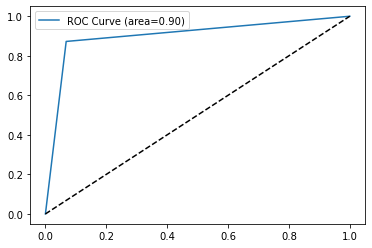

In [67]:
plt.plot(fpr, tpr, label='ROC Curve (area=%0.2f)' % score)
plt.plot([0,1], [0,1], 'k--')
plt.legend()
plt.show()

##### 7. Submission

In [68]:
df1 = pd.read_csv('test.csv')
df1.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297


In [69]:
df2 = pd.DataFrame(df1['id'])
df2.head()

,id
0,381110
1,381111
2,381112
3,381113
4,381114


In [70]:
df2.insert(1, 'Response',list(pred2) , True) 

In [71]:
df2.head()

,id,Response
0,381110,0
1,381111,1
2,381112,1
3,381113,0
4,381114,0


In [72]:
df2.shape

(127037, 2)

In [73]:
df2.to_csv("Submission.csv", index = True)

* **Overall Conclusion -** 
* 1. People having Vehicles with age > 2 years have to pay more amount of annual premium and that has lead to higher number of people from that category not taking insurance. We need to modify the amount little bit so that people from that category do not skip taking insurance


* 2. people having Vehicle Damage tend to buy insurance as compared to the ones who do not have any damage.


* 3. Annual Premium does not depend on how many days people are associated with company. So we can modify the premium policy so that insurance company can attract more customers.


* 4. Overall there many negative response than positive response from the customers thus we can assume that most of the product offering from the insurance company are degraded or the customer after sales response is not good or the product offering are not covering today's world customer needs or there is lack of marketing strategy from the insurance company.


* 5. Thus, We can conclude that the insurance company overall need to improve in terms of all offerings and also increasing the marketability of the product so that those negative responses can be converted more positive responses.
